<a href="https://colab.research.google.com/github/haiderzm/GANs/blob/main/SimpleGAN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Imports

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader
import torchvision
import torchvision.datasets as datasets
import torchvision.transforms as transforms
import numpy as np
import matplotlib.pyplot as plt

### Data

In [ ]:
t = transforms.Compose([
                        transforms.ToTensor(),
                        transforms.Normalize((0.5,),(0.5,))
])

In [ ]:
train_data = datasets.MNIST(root='/data', download=True, train=True, transform=t)

In [ ]:
batch_size = 100

In [ ]:
train_dl = DataLoader(train_data, batch_size=batch_size, shuffle = True)

In [ ]:
def deNorm(img):
  return img * 0.5 + 0.5

### Data Visualisation

torch.Size([100, 1, 28, 28])


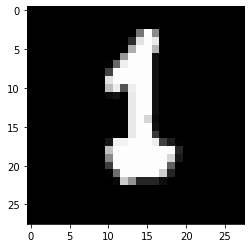

In [ ]:
for img, _ in train_dl:
  print(img.shape)
  plt.imshow(deNorm(img[0].squeeze()), cmap='gray')
  break

In [ ]:
def show_images(images, nmax=100):
  fig, ax = plt.subplots(figsize=(10,10))
  ax.set_xticks([]) 
  ax.set_yticks([])
  ax.imshow(torchvision.utils.make_grid(deNorm(images[:nmax]), nrow=10).permute(1,2,0))

In [ ]:
def show_batch(dl, nmax=100):
    for images, _ in dl:
        print(images.detach()[:nmax].shape)
        show_images(images, nmax)
        break

torch.Size([100, 1, 28, 28])


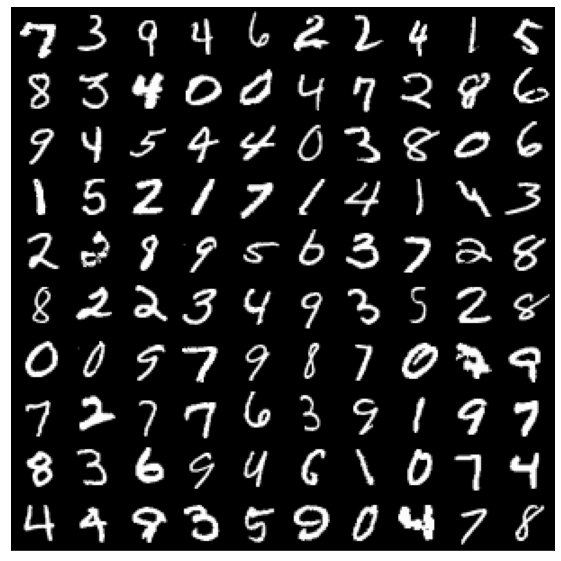

In [ ]:
show_batch(train_dl)

### Discriminator Network

In [ ]:
class Discriminator(nn.Module):
  def __init__(self, in_features):
    super().__init__()
    self.disc = nn.Sequential(
        nn.Linear(in_features, 256),
        nn.LeakyReLU(0.01),
        nn.Linear(256,1),
        nn.Sigmoid()
    )

  def forward(self, img):
    return self.disc(img)

### Generator Network

In [ ]:
class Generator(nn.Module):
  def __init__(self,z_dim, img_dim):
    super().__init__()
    self.gen = nn.Sequential(
          nn.Linear(z_dim, 256),
          nn.LeakyReLU(0.01),
          nn.Linear(256, img_dim),
          nn.Tanh()
    )

  def forward(self, x):
    return self.gen(x)

### Hyperparameters

In [ ]:
device = "cuda" if torch.cuda.is_available() else "cpu"
lr = 3e-4
z_dim = 64
image_dim = 28 * 28 * 1  
batch_size = 100
num_epochs = 20

### Model Instance

In [ ]:
disc = Discriminator(image_dim).to(device)
gen = Generator(z_dim, image_dim).to(device)

In [ ]:
fixed_noise = torch.randn((batch_size, z_dim)).to(device)

### Optimizers and loss function

In [ ]:
opt_disc = optim.Adam(disc.parameters(), lr=lr)
opt_gen = optim.Adam(gen.parameters(), lr=lr)

criterion = nn.BCELoss()

### Image Saving

In [ ]:
sample_dir = 'generated'
import os
os.makedirs(sample_dir, exist_ok=True)

In [ ]:
def save_samples(index, latent_tensors, show=True):
  fake_images = gen(latent_tensors)
  print(fake_images.shape)
  fake_images = fake_images.view(-1,1,28,28)
  fake_fname = 'generated-images-{0:0=4d}.png'.format(index)
  torchvision.utils.save_image(deNorm(fake_images), os.path.join(sample_dir, fake_fname), nrow=10)
  print('Saving', fake_fname)
  if show:
    fig, ax = plt.subplots(figsize=(10, 10))
    ax.set_xticks([]); ax.set_yticks([])
    ax.imshow(torchvision.utils.make_grid(fake_images.cpu().detach(), nrow=10).permute(1, 2, 0), cmap='gray')

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


torch.Size([100, 64])
torch.Size([100, 784])
Saving generated-images-0000.png


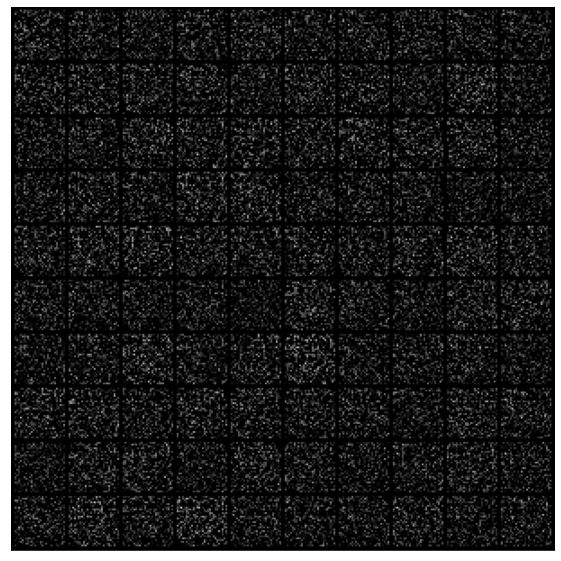

In [ ]:
fixed_latent = torch.randn(100, z_dim, device=device)
print(fixed_latent.shape)
save_samples(0, fixed_latent)

### Training

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


torch.Size([100, 784])
Saving generated-images-0001.png


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


torch.Size([100, 784])
Saving generated-images-0002.png


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


torch.Size([100, 784])
Saving generated-images-0003.png


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


torch.Size([100, 784])
Saving generated-images-0004.png


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


torch.Size([100, 784])
Saving generated-images-0005.png


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


torch.Size([100, 784])
Saving generated-images-0006.png


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


torch.Size([100, 784])
Saving generated-images-0007.png


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


torch.Size([100, 784])
Saving generated-images-0008.png


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


torch.Size([100, 784])
Saving generated-images-0009.png


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


torch.Size([100, 784])
Saving generated-images-0010.png


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


torch.Size([100, 784])
Saving generated-images-0011.png


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


torch.Size([100, 784])
Saving generated-images-0012.png


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


torch.Size([100, 784])
Saving generated-images-0013.png


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


torch.Size([100, 784])
Saving generated-images-0014.png


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


torch.Size([100, 784])
Saving generated-images-0015.png


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


torch.Size([100, 784])
Saving generated-images-0016.png


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


torch.Size([100, 784])
Saving generated-images-0017.png


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


torch.Size([100, 784])
Saving generated-images-0018.png


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


torch.Size([100, 784])
Saving generated-images-0019.png


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


torch.Size([100, 784])
Saving generated-images-0020.png


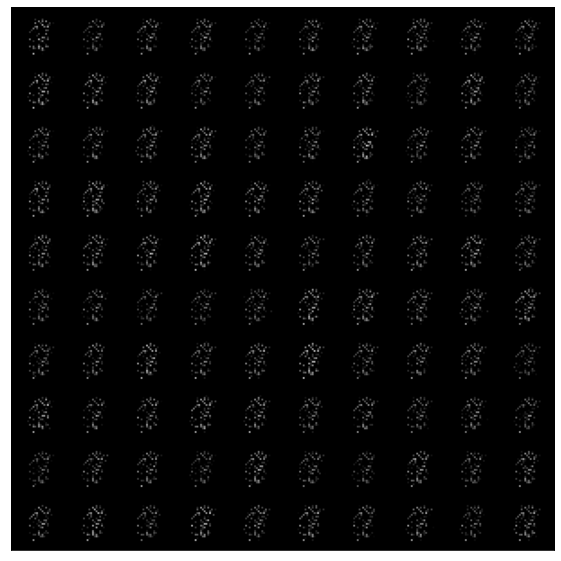

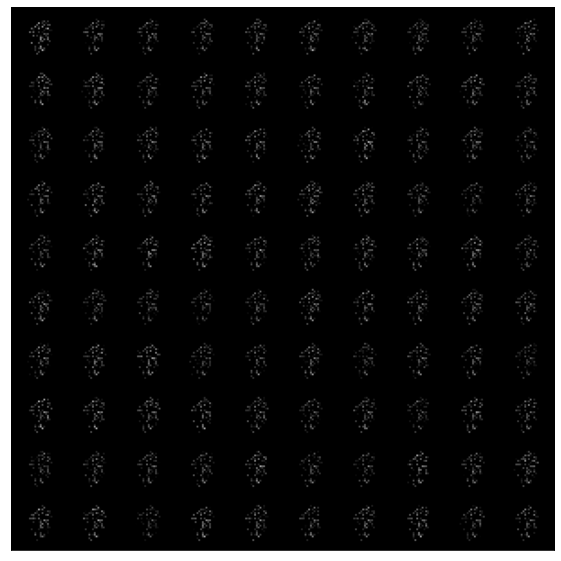

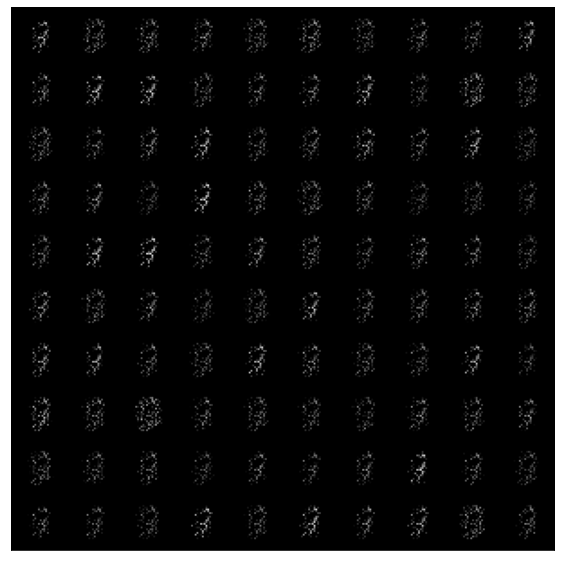

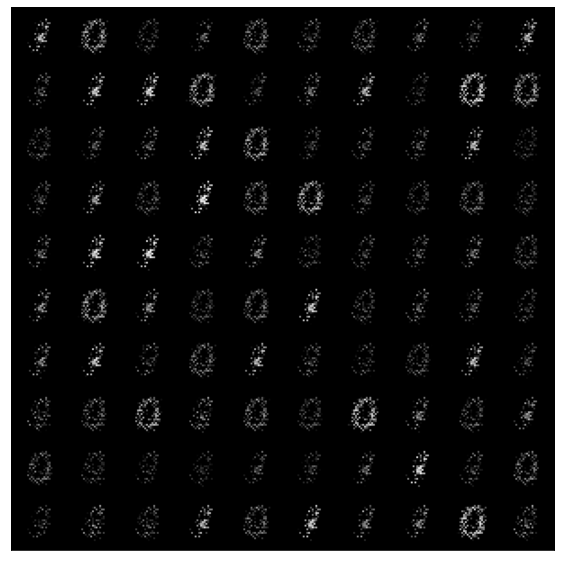

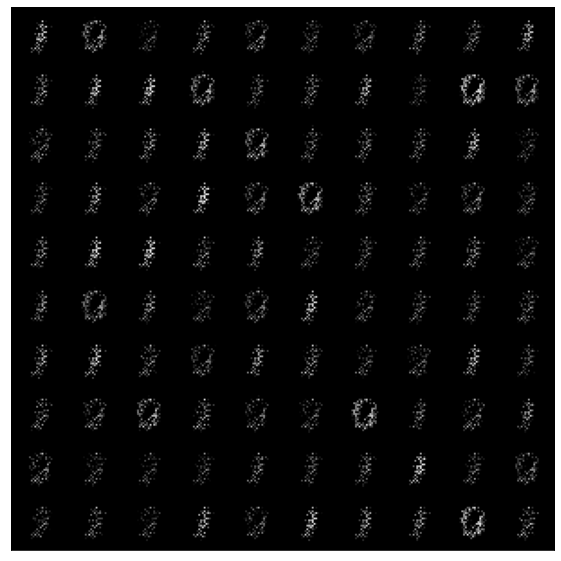

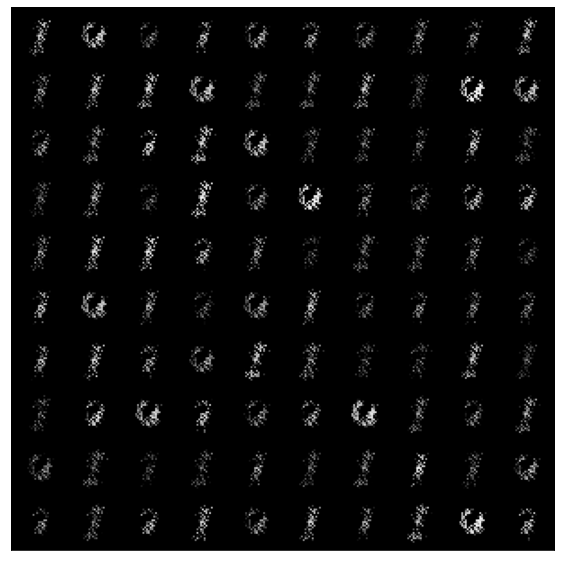

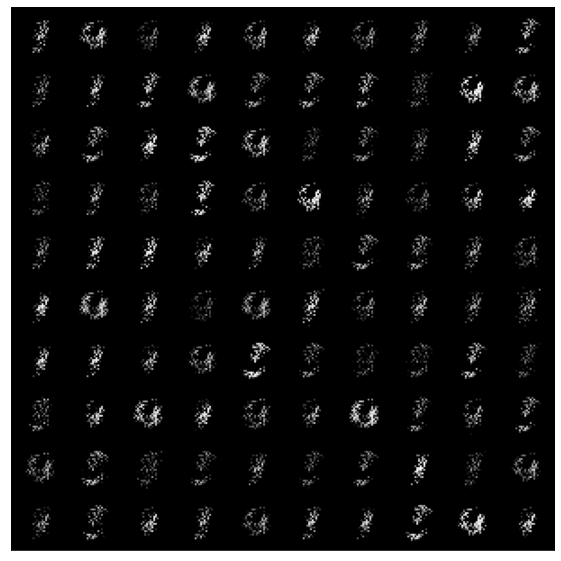

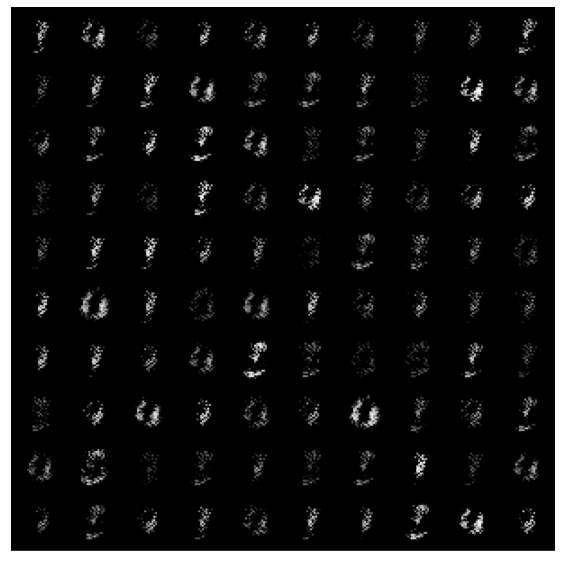

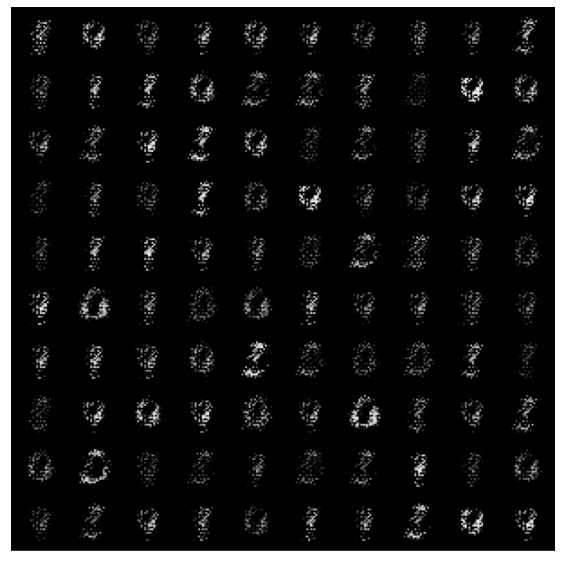

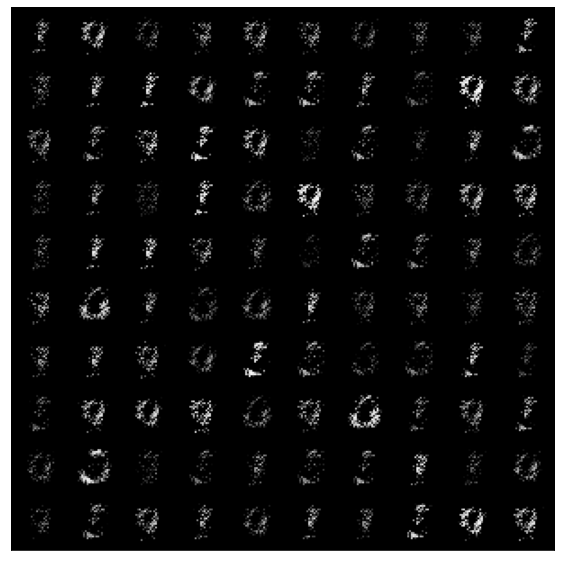

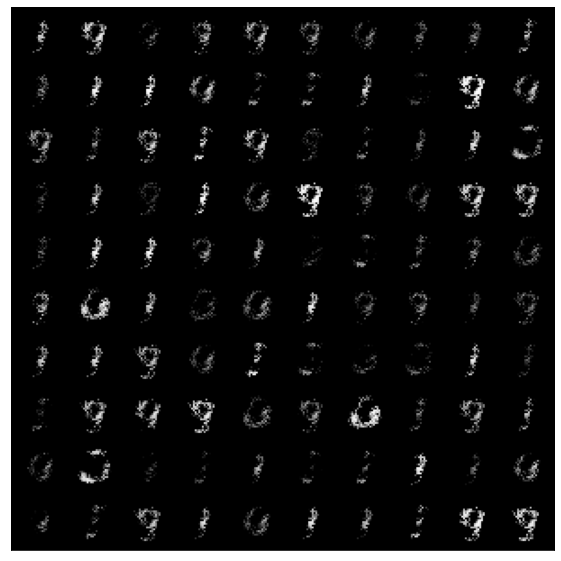

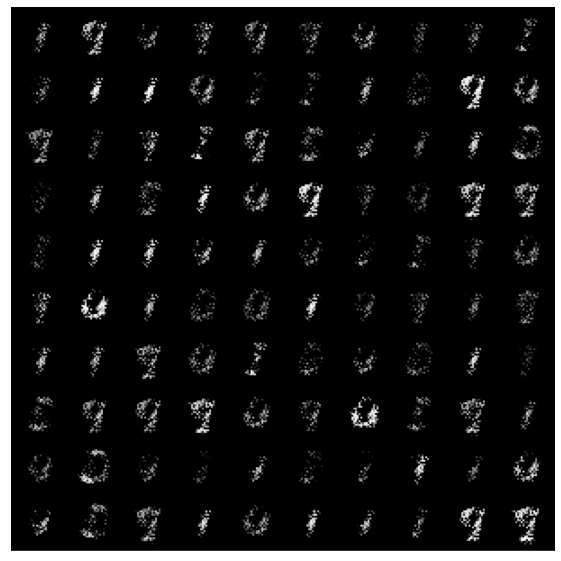

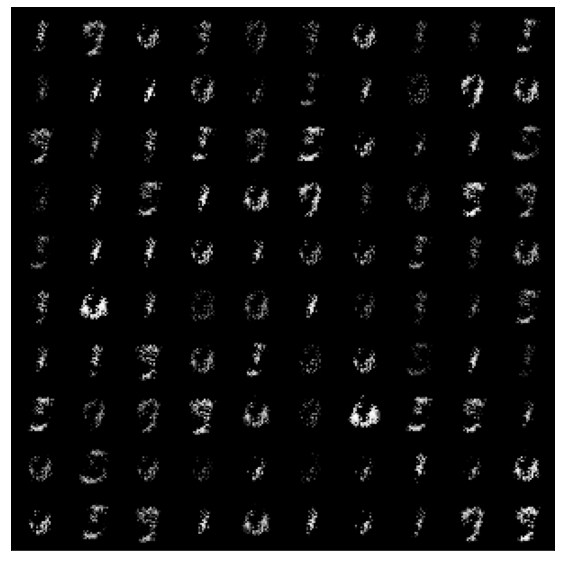

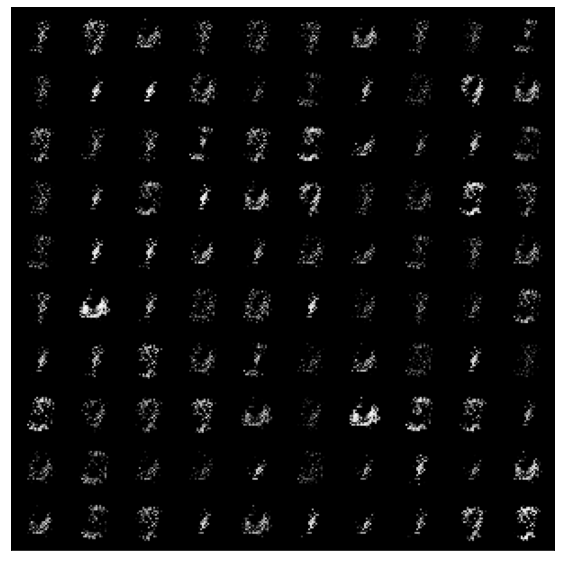

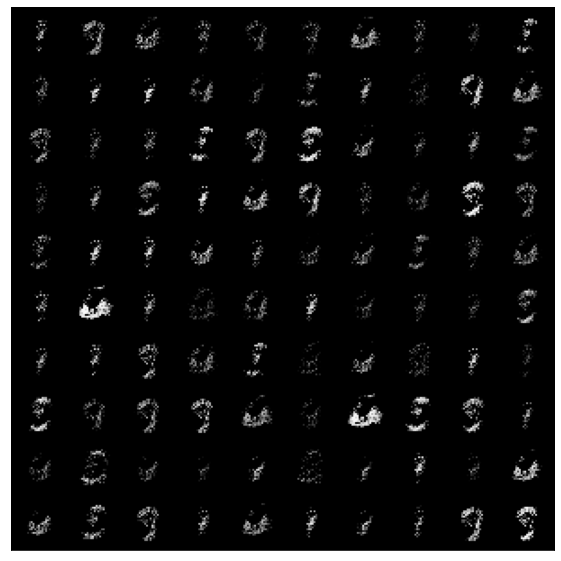

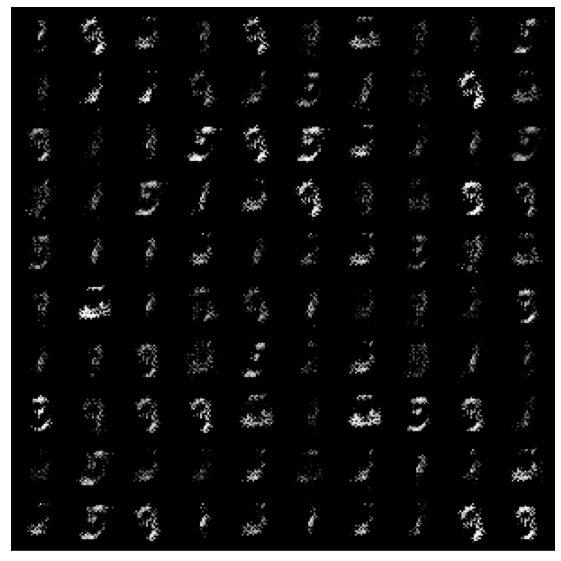

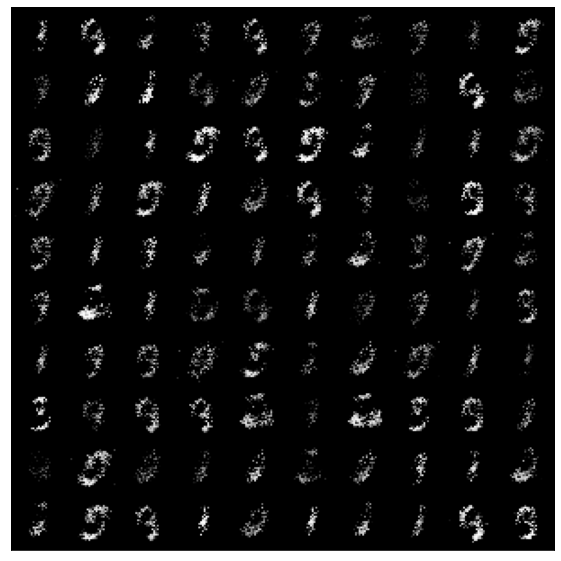

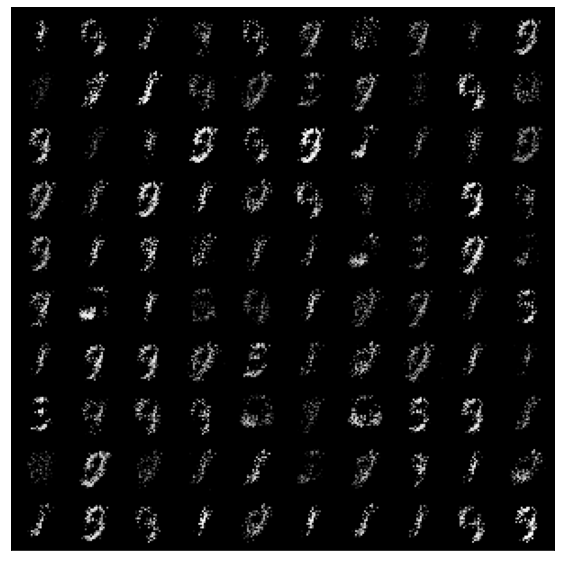

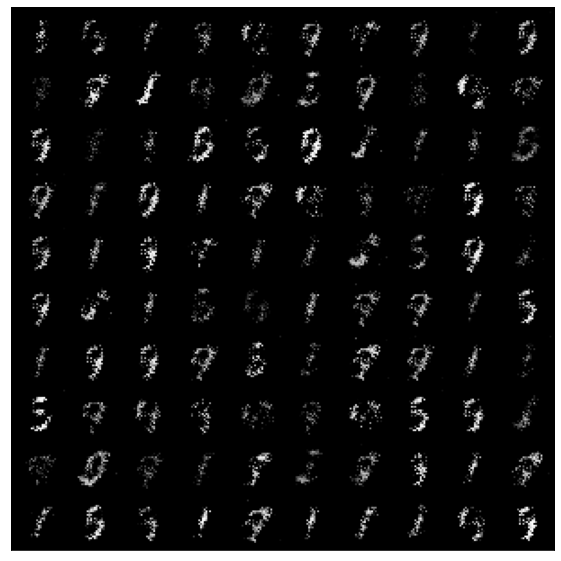

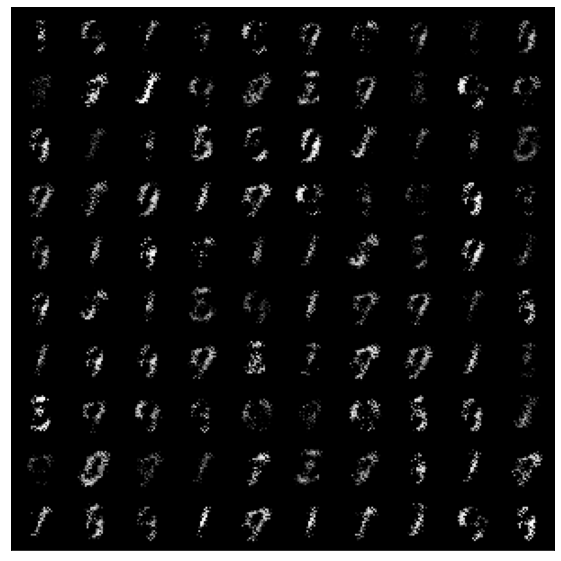

In [ ]:
for e in range(num_epochs):
  for real, _ in train_dl:
    real = real.view(-1,784).to(device)
    batch_size = real.shape[0]

    # Discriminator Training Section
    noise = torch.randn(batch_size, z_dim).to(device)
    fake = gen(noise)

    disc_real = disc(real).view(-1)
    lossD_real = criterion(disc_real, torch.ones_like(disc_real))

    disc_fake = disc(fake).view(-1)
    lossD_fake = criterion(disc_fake, torch.zeros_like(disc_fake))

    lossD = (lossD_real + lossD_fake)/2

    disc.zero_grad()
    lossD.backward(retain_graph=True)
    opt_disc.step()

    # Generator Training Section
    output = disc(fake).view(-1)
    lossG = criterion(output, torch.ones_like(output))
    gen.zero_grad()
    lossG.backward()
    opt_gen.step()
  
  save_samples(e+1, fixed_latent)

### Video Creation

In [ ]:
import cv2

vid_fname = 'gans_training.avi'

files = [os.path.join(sample_dir, f) for f in os.listdir(sample_dir) if 'generated' in f]
files.sort()
print(files)

fourcc = cv2.VideoWriter_fourcc(*'mp4v') 
out = cv2.VideoWriter(vid_fname,fourcc, 1, (530,530))
[out.write(cv2.imread(fname)) for fname in files]
out.release()

['generated/generated-images-0000.png', 'generated/generated-images-0001.png', 'generated/generated-images-0002.png', 'generated/generated-images-0003.png', 'generated/generated-images-0004.png', 'generated/generated-images-0005.png', 'generated/generated-images-0006.png', 'generated/generated-images-0007.png', 'generated/generated-images-0008.png', 'generated/generated-images-0009.png', 'generated/generated-images-0010.png', 'generated/generated-images-0011.png', 'generated/generated-images-0012.png', 'generated/generated-images-0013.png', 'generated/generated-images-0014.png', 'generated/generated-images-0015.png', 'generated/generated-images-0016.png', 'generated/generated-images-0017.png', 'generated/generated-images-0018.png', 'generated/generated-images-0019.png', 'generated/generated-images-0020.png']
